In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['mathtext.fontset'] = 'cm'  # Computer Modern for math

axis_label_fontsize = 17
title_fontsize = 13
legend_fontsize = 9
parent_nace_list = ["A","B","C","F","H","G"]
tick_label_fontsize =12
pd.set_option("display.max_columns",100)

colors = [
    "#2ab421",   # Less vivid green
    "#f93a2e",  # Vivid red
    "#d02670",  # Strong pink
    "#ff7a00",  # Bright orange
    "#1dd3c1",  # Vivid turquoise
    "#8a2be2",   # Electric purple
    "#ffafd2",  # Bright pink
    "#fff537",  # Bright yellow
    "#4589ff",  # Vibrant blue
    "#d4b237",  # Bold yellow-orange
    "#c677e2",  # Lively purple
    "#a2a9b0",  # Muted grayish blue
    "#baf0ce",  # Soft green
    "#b7e1ff",  # Light blue
    "#ebeced",  # Light gray
    "#dbc7ff",  # Pale purple
    "#6fdc8c",  # Bright green
]


In [30]:
df = pd.read_csv("results/energy_consumption_and_trends_firms_2020-2024.csv")
df = df.rename(columns = {"low-carbon_elec_share_growth_robust":"decarbonization_trend"})
df = df.sort_values(by="parent_nace").reset_index(drop = True)

colors_dict = dict(zip(df.parent_nace.unique(), colors))
colors_dict

df_nace_desc = pd.read_csv("data/nace_description.csv")
nace_desc_dict = dict(zip(df_nace_desc.nace.unique(), df_nace_desc.description.unique()))

df["color"] = df["parent_nace"].map(colors_dict)
df["parent_nace_desc"] = df["parent_nace"].map(nace_desc_dict)
df["parent_nace_desc"] = df["parent_nace"] + " - " + df["parent_nace_desc"].apply(lambda x: x if len(x) <= 30 else x[:27] + "...")
df

colors_dict_with_desc = dict(zip(df.parent_nace_desc.unique(), df.color.unique()))
colors_dict_with_desc

{'A - AGRICULTURE, FORESTRY AND F...': '#2ab421',
 'B - MINING AND QUARRYING': '#f93a2e',
 'C - MANUFACTURING': '#d02670'}

In [ ]:
# Define the thresholds and corresponding marker sizes
threshold1 = 407036190    # Firms with revenues below 1 million
threshold2 = 4070361904    # Firms with revenues between 1 million and 1 billion
threshold3 = 40703619040   # Firms with revenues between 1 million and 1 billion
threshold4 = 407036190402

# Marker sizes corresponding to the thresholds
size_small = 0.15  # Slightly larger for small firms
size_medium = 2  # Medium-sized firms
size_large = 15  # Larger firms
size_larger = 60  # Very large firms
size_largest = 100 # largest firms

# Sample dataframe
# df = pd.DataFrame({'revenue_2022': [5*10**5, 5*10**6, 5*10**9, 2*10**10]})

# Function to map revenue to marker size
def map_marker_size(revenue):
    if revenue < threshold1:
        return size_small
    elif threshold1 <= revenue < threshold2:
        return size_medium
    elif threshold2 <= revenue < threshold3:
        return size_large
    elif threshold3 <= revenue < threshold4:
        return size_larger
    else:
        return size_largest

df['marker_size'] = df['avg_revenue'].apply(map_marker_size)

<>:64: SyntaxWarning: invalid escape sequence '\o'
<>:64: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Johannes\AppData\Local\Temp\ipykernel_14328\861099997.py:64: SyntaxWarning: invalid escape sequence '\o'
  ax2.set_ylabel("avg. low-carbon share $\overline{l_i}$", fontsize=axis_label_fontsize-2)
C:\Users\Johannes\AppData\Local\Temp\ipykernel_14328\861099997.py:47: UserWarning: The palette list has more values (17) than needed (3), which may not be intended.
  sns.boxplot(
C:\Users\Johannes\AppData\Local\Temp\ipykernel_14328\861099997.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


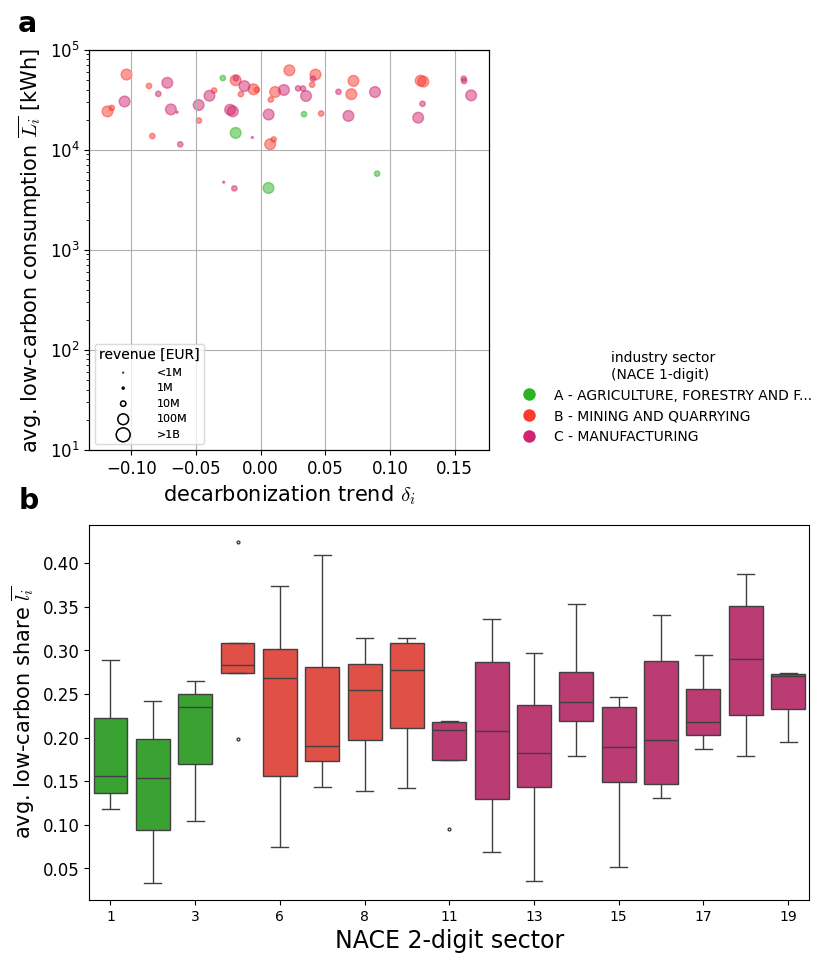

In [38]:
# Create the figure
fig = plt.figure(figsize=(8, 5))  # Overall figure size
gs = GridSpec(2, 1, height_ratios=[1, 1])  # GridSpec for height ratios

top_width = 0.5  # Half the width of the bottom figure
top_left = (1 - top_width) / 2  # Center horizontally
ax = fig.add_axes([0, 1, 0.5, 0.8])  # [left, bottom, width, height]

# Draw some content (e.g., a circle for visualization)
ax.scatter(df["decarbonization_trend"], df["avg_lowcarbon_elec_consumption_KWH"], 
           s=df["marker_size"], 
           c=df["color"],
           alpha=0.5)

ax.set_yscale("log")
ax.grid(zorder=0)
ax.set_ylabel(r"avg. low-carbon consumption $\overline{L_i}$ [kWh]", fontsize=axis_label_fontsize-2)
ax.set_xlabel(r"decarbonization trend $\delta_i$", fontsize=axis_label_fontsize-2)
ax.set_ylim(10**1, 10**5)

# Add legend for NACE 1-digit
handles = [plt.Line2D([0], [0], marker='o', color='w', label=nace, 
                      markerfacecolor=color, markersize=10) 
           for nace, color in colors_dict_with_desc.items()]
ax.legend(handles=handles, title='industry sector\n(NACE 1-digit)', loc=(1.05, 0), fontsize=legend_fontsize+1, edgecolor = "none")
plt.xticks(fontsize = tick_label_fontsize)
plt.yticks(fontsize = tick_label_fontsize)

# Add secondary legend for revenue thresholds
ax1 = ax.twinx()
ax1.set_yticks([])
thresholds = ["<1M", "1M", "10M", "100M", ">1B"]
sizes = [size_small, size_medium, size_large, size_larger, size_largest]
for i, size in enumerate(sizes):
    ax1.scatter([], [], s=size, edgecolor='black', facecolor='none', label=thresholds[i])

legend = ax1.legend(title="revenue [EUR]", loc="lower left", handletextpad=2, scatterpoints=1, fontsize=legend_fontsize-1, framealpha=0.5)
ax1.add_artist(legend)



# Bottom plot:
bottom_width = 0.9  # A little less than the full figure width
bottom_left = (1 - bottom_width) / 2  # Center horizontally
ax2 = fig.add_axes([0, 0.1, bottom_width, 0.75])  # [left, bottom, width, height]

sns.boxplot(
    ax=ax2,
    data=df,
    x="nace2",
    y="avg_lowcarbon_elec_share",
    hue="parent_nace",
    palette=colors,
    legend=False,
)
plt.yticks(fontsize = tick_label_fontsize)
plt.xticks(fontsize = 10)

# Adjust marker size of fliers
for line in ax2.lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

ax2.set_ylabel("avg. low-carbon share $\overline{l_i}$", fontsize=axis_label_fontsize-2)
ax2.set_xlabel("NACE 2-digit sector", fontsize=axis_label_fontsize)
labels = ax2.get_xticks()
ax2.set_xticks(labels[::2]) 


# add letters
def insert_letter(a, lett, xpos,ypos):
    a.text(xpos, ypos,lett,
           fontdict={ 'size':str(1.2*axis_label_fontsize)}, transform=a.transAxes,
          zorder=100000, va='top', ha='right', weight='bold')

xpos_a, ypos_a = -0.13, 1.10
xpos_b, ypos_b = -0.07, 1.10
insert_letter(ax1,"a", xpos_a,ypos_a)
insert_letter(ax2,"b", xpos_b, ypos_b)

# Adjust layout
plt.tight_layout()


plt.savefig("plots/FIG2_heterogeneity.pdf", dpi = 300, bbox_inches="tight")